In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage

Рассмотрим на примере ирисов, только возьмем 50 первых точек, чтобы дендрограмма была более четкой. 

In [2]:
iris = load_iris()
X = iris.data

In [3]:
X = X[:50, :]
X.shape

(50, 4)

In [5]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
# distance_treshold - порог для дистанция между точками, если не равен None, то n_clusters(число кластеров) == None

In [6]:
model = model.fit(X)

In [7]:
# Number of clusters
model.n_clusters_

50

In [11]:
Z = hierarchy.linkage(model.children_, 'ward')

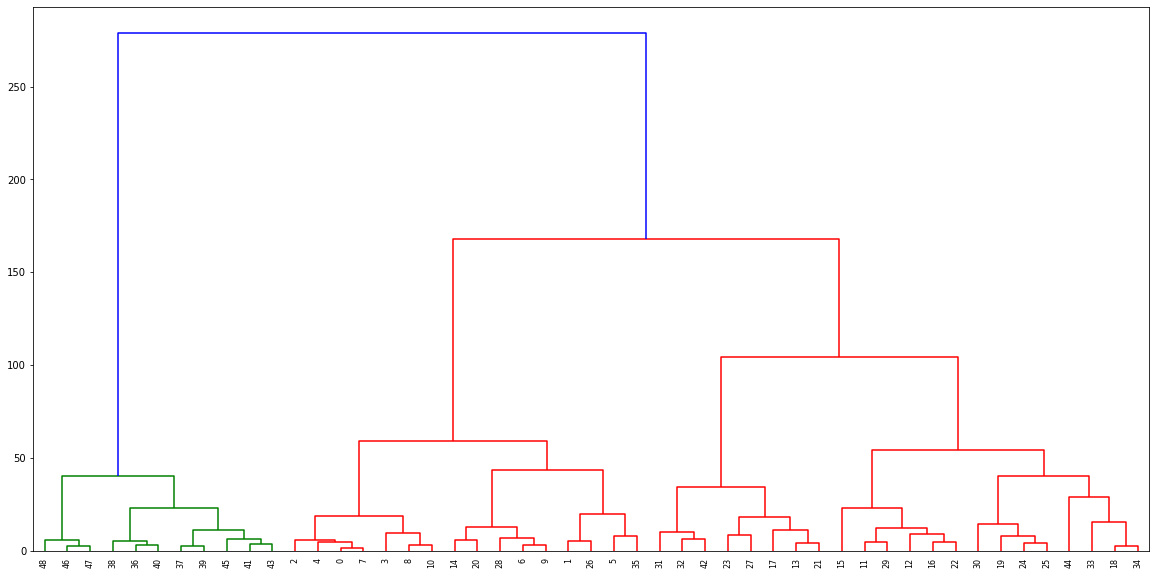

In [14]:
# Построим нашу дендрограмму
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [15]:
model = AgglomerativeClustering(distance_threshold=0.8, n_clusters=None)
model = model.fit(X)
model.n_clusters_

9

Рассмотрим агломеративную кластеризацию, применяя метод полной связи. Такую процедуру можно представить в виде следующих шагов:
    1. Вычислить матрицу расстояний для всех образцов. 
    2. Представить каждую точку данных как одноэлементный кластер. 
    3. Объединить два ближайщих кластера, основываясь на расстоянии между самыми непохожими (дальними) членам
    4. Обновить матрицу подобия
    5. Повторять 2-4, пока не останется единственный кластер

In [19]:
# Сгенерируем случайные данные образцов
np.random.seed(123)
variables = ['X','Y','Z']
labels = ['0','1','2','3','4']
X = np.random.random_sample([5,3]) * 10
data = pd.DataFrame(X, columns=variables, index=labels)
data

,X,Y,Z
0,6.964692,2.861393,2.268515
1,5.513148,7.194690,4.231065
2,9.807642,6.848297,4.809319
3,3.921175,3.431780,7.290497
4,4.385722,0.596779,3.980443


In [24]:
# Вычислим матрицу расстояний
row_dist = pd.DataFrame(squareform(pdist(data,metric='euclidean')),columns=labels, index=labels)
# симметричная матрица расстояний
row_dist

,0,1,2,3,4
0,0.000000,4.973534,5.516653,5.899885,3.835396
1,4.973534,0.000000,4.347073,5.104311,6.698233
2,5.516653,4.347073,0.000000,7.244262,8.316594
3,5.899885,5.104311,7.244262,0.000000,4.382864
4,3.835396,6.698233,8.316594,4.382864,0.000000


In [26]:
row_cluster = linkage(pdist(data, metric='euclidean'),method='complete')

Чтобы более подробно рассмотреть результаты кластеризации, превратим их в объект DataFrame 

In [27]:
pd.DataFrame(row_cluster, columns=['метка строки 1','метка строки 2','расстояние','число элементов в кластере'],
            index=['кластер %d' % (i + 1) for i in range(row_cluster.shape[0])])

,метка строки 1,метка строки 2,расстояние,число элементов в кластере
кластер 1,0.0,4.0,3.835396,2.0
кластер 2,1.0,2.0,4.347073,2.0
кластер 3,3.0,5.0,5.899885,3.0
кластер 4,6.0,7.0,8.316594,5.0


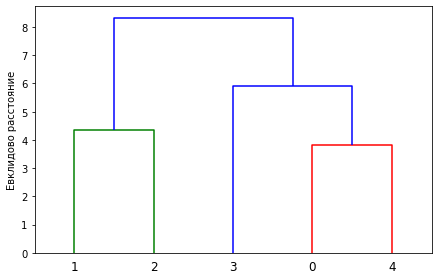

In [28]:
# Имея вычисленную матрицу связей, визуализируем результаты в форме дендрограммы
row_dendr = dendrogram(row_cluster, labels=labels)
plt.tight_layout()
plt.ylabel('Евклидово расстояние')
plt.show()

#### Прикрепление дендрограмм к тепловой карте
В практических приложениях дендрограммы иерархической кластеризации часто используются в сочетании с **тепловой картой**, позволяющей представлять индивидуальные значения в матрице образцов с помощью цветового кода. 

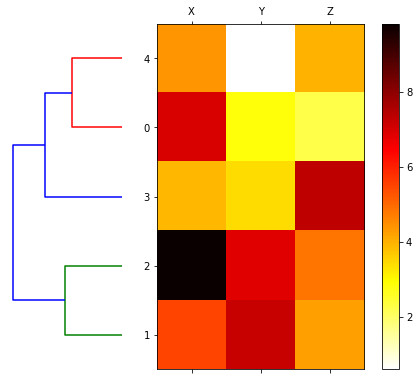

In [31]:
# Создадим новый объект figure и определим позицию оси X и Y, ширину и высоту дендрограммы через атрибут add_axes,
# а так же, повернем дендрограмму на 90 градусов против часовой стрелки
fig = plt.figure(figsize=(8,8),facecolor='white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_cluster, orientation='left')

#Затем посредством ключа leaves переупорядочиваем данные в первоначальном объекте DataFrame согласно меткам кластеров
df_rowclust = data.iloc[row_dendr['leaves'][::-1]]

# Строим тепловую карту
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest',cmap='hot_r')

# Улучшим восприятие графика, удалив отметки с осей и скрыв их линии, а так же добавим цветовую полосу и назначим названия признаков
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()


По рисунку можно заметить, что порядок следования строк в тепловой карте отражает кластеризацию образцов на дендрограмме. 